### This is the simple workflow with graph

In [57]:
# show this later on
def function3(input3):
    return input3

In [58]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output = function3("this is function 3 in between")
    return input2 + " " + output + " and savita from second function"

In [59]:
from langgraph.graph import Graph
from langgraph.graph import START, END

In [60]:
workflow1 = Graph()

In [61]:
workflow1.add_node("function1", function1)

In [62]:
workflow1.add_node("function2",function2)

In [63]:
workflow1.add_edge("function1","function2")

In [64]:
# workflow1.set_entry_point("function1")

workflow1.add_edge(START,"function1")

In [65]:
workflow1.set_finish_point("function2")

In [66]:
app1=workflow1.compile()

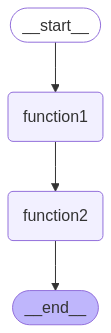

In [67]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [68]:
app1.invoke("hi this is sunny ")

'hi this is sunny from first function this is function 3 in between and savita from second function'

In [69]:
input="hi this is sunny "

In [70]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
hi this is sunny from first function


here is output from function2
_______
hi this is sunny from first function this is function 3 in between and savita from second function




# Now lets create workflow with llm

In [71]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

llm.invoke("hi").content

'Hi there! How can I help you today?'

In [72]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
    response=llm.invoke(input).content
    return response
    

In [73]:
def function2(input):
    upper_case = input.upper()
    return upper_case
    

In [74]:
from langgraph.graph import Graph
workflow2 = Graph()

In [75]:
workflow2.add_node("llm",function1)

In [76]:
workflow2.add_node("upper_string",function2)

In [77]:
workflow2.add_edge("llm","upper_string")

In [78]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [79]:
app2 = workflow2.compile()

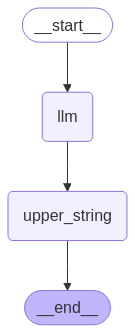

In [80]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [81]:
app2.invoke("what is a name of first indian prime minister?")

'JAWAHARLAL NEHRU WAS THE FIRST PRIME MINISTER OF INDIA.'

In [82]:
print(app2.invoke("what is genai explain in detail?"))

"GENAI" IS SHORTHAND FOR **GENERATIVE ARTIFICIAL INTELLIGENCE**.  IT REFERS TO A CATEGORY OF ARTIFICIAL INTELLIGENCE ALGORITHMS DESIGNED TO GENERATE NEW, ORIGINAL CONTENT. THIS CONTENT CAN TAKE MANY FORMS, INCLUDING TEXT, IMAGES, AUDIO, CODE, 3D MODELS, VIDEOS, AND OTHER DATA.  UNLIKE OTHER AI SYSTEMS THAT ARE PRIMARILY FOCUSED ON ANALYZING EXISTING DATA (LIKE CLASSIFYING IMAGES OR PREDICTING OUTCOMES), GENAI *CREATES* SOMETHING NEW.

HERE'S A BREAKDOWN OF KEY ASPECTS:

**HOW IT WORKS:**

GENERATIVE AI MODELS TYPICALLY RELY ON DEEP LEARNING TECHNIQUES, PARTICULARLY A SUBSET CALLED **GENERATIVE ADVERSARIAL NETWORKS (GANS)** OR **TRANSFORMERS**.

* **GANS:** THESE CONSIST OF TWO NEURAL NETWORKS – A *GENERATOR* AND A *DISCRIMINATOR* – WORKING IN TANDEM. THE GENERATOR TRIES TO CREATE REALISTIC DATA, WHILE THE DISCRIMINATOR TRIES TO DISTINGUISH BETWEEN REAL DATA AND THE GENERATOR'S OUTPUT.  THROUGH THIS ADVERSARIAL PROCESS, THE GENERATOR IMPROVES ITS ABILITY TO CREATE CONVINCING CONTENT.
* 

In [83]:
input = "what is a name of first indian prime minister?"

In [84]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 44
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 42
}
]

### Here lets create our own output token counter

In [85]:
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number = f"total token number is {token_number}"
    return token_number

In [86]:
#Create the Graph
workflow3 = Graph()

workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")

app3 = workflow3.compile()


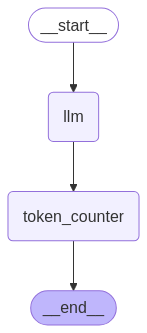

In [87]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [88]:
app3.invoke("what is a name of first indian prime minister?")

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 33
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 31
}
]

In [89]:
app3.invoke("what is genai explain in detail?")

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 23
}
].


'total token number is 630'

In [90]:
input = "what is genai explain in detail?"
### Output 
for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
"GenAI" is shorthand for **Generative Artificial Intelligence**.  It refers to a category of artificial intelligence algorithms that can create new content, ranging from text and code to images, music, and even 3D models.  Unlike other AI systems that are designed primarily to classify or analyze existing data, GenAI focuses on generating novel data that often resembles human-created content.

Here's a breakdown of key aspects:

**How GenAI Works:**

Most GenAI models are based on deep learning architectures, particularly a type called **neural networks**.  These networks learn patterns and structures from massive datasets of existing content (e.g., text, images, code).  Two prominent architectures are:

* **Generative Adversarial Networks (GANs):** GANs consist of two networks: a *generator* that creates new content and a *discriminator* that tries to distinguish between real and generated content.  They work in a competitive manner, with the generator 

In [91]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'A Comprehensive Guide About Langgraph: Code Included - Ionio',
  'url': 'https://www.ionio.ai/blog/a-comprehensive-guide-about-langgraph-code-included',
  'content': 'A node can be any function or tool your agent uses in langgraph and these nodes are connected with other nodes using edges. Every workflow ends with a “END”',
  'score': 0.8872928},
 {'title': 'What Is LangGraph and How to Use It? - DataCamp',
  'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': 'To install LangGraph, you can use pip:\npip install -U langgraph\nPowered By \nWas this helpful? Yes No\nBasic Concepts\nNodes: Nodes represent units of work within your LangGraph. They are typically Python functions that perform a specific task, such as: [...] Imagine your application as a directed graph. In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent

### Question: Can we integrating a RAG Pipeline?

### Answer: yes we can!

In [92]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [93]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [94]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [131]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [132]:
loader=DirectoryLoader("./data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [133]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [134]:
query = "what is meta llama3?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': 'data\\Test_file.txt'}
as words, images, videos and audio generated by an ML model. This high-dimensional vector data,
page_content='as words, images, videos and audio generated by an ML model. This high-dimensional vector data,' metadata={'source': 'data\\Test_file.txt'}
page_content='as words, images, videos and audio generated by an ML model. This high-dimensional vector data,' metadata={'source': 'data\\Test_file.txt'}
page_content='is a labor-intensive process, especially with new generative use cases such as similarity search.' metadata={'source': 'data\\Test_file.txt'}


In [135]:
def function_1(AgentState):
    
    message = AgentState["messages"]
    
    question = message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [136]:
#Agents State is the Dictionary

AgentState = {}

In [137]:
AgentState["messages"]=[]

In [138]:
AgentState

{'messages': []}

In [139]:
AgentState["messages"].append("hi, how are you?")

In [140]:
AgentState

{'messages': ['hi, how are you?']}

In [141]:
AgentState["messages"].append("hi, what you doing?")

In [142]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [143]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [ ]:
# Define a Langchain graph
from langgraph.graph import Graph

workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

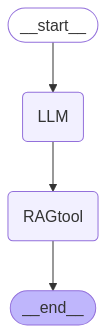

In [145]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [146]:
inputs = {"messages": ["Tell me about llama3 model"]}

In [147]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['Tell me about llama3 model', 'A large language model developed by Meta, trained on a larger dataset than its predecessors (Llama 2), and available in different sizes.  It boasts improved performance, including better coding abilities.']}

---

Output from node 'RAGtool':
---
This text does not contain any information about the llama3 model. It discusses scalars, using the example of low, mean, and high temperatures in a weather model, and mentions machine learning (ML) as a term for groups of numbers.

---



In [148]:
#### Let's Try these Workflow

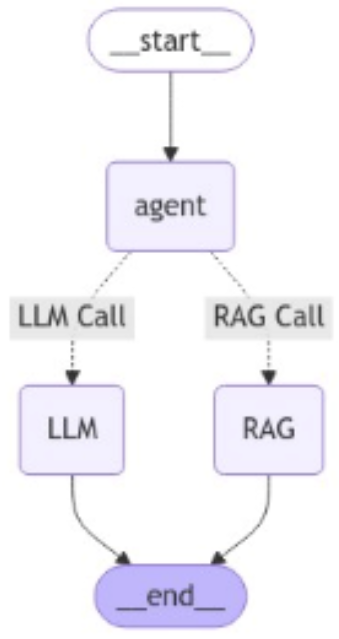

In [149]:
loader2 = DirectoryLoader("./data2",glob="./*.txt",loader_cls=TextLoader)
docs2 = loader2.load()

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 50
)

new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]

In [150]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [151]:
query = "Tell me about India's Industrial Growth?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': 'data2\\indian_economy.txt'}
India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': 'data2\\indian_economy.txt'}
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': 'data2\\indian_economy.txt'}
page_content='India’s strong export sectors—including textiles, IT services, and automotive manufacturing—had' metadata={'source': 'data2\\indian_economy.txt'}


1. TypedDict:
- TypedDict is a special type that allows you to define a dictionary in Python where each key has a specific type.
It’s useful when you want to enforce type checks on the keys and values of a dictionary.

2. Annotated:
- Annotated is used to add metadata or constraints to a type.
It’s typically used for adding additional information, like constraints or descriptions, to the type.

3. Sequence[BaseMessage]:
- Sequence is a generic type from Python's typing module that represents a list-like structure (such as a list or tuple) where the order matters, and you can access elements by their position.

4. BaseMessage:
- Basemessage: This assumes you're working with the LangChain framework, and BaseMessage is part of its core messaging system. It is typically used when handling or processing messages in LangChain's workflows

5. operator.add:

- operator.add is a function from Python’s operator module that performs addition (+) on its arguments.
In this context, operator.add is being used as metadata for the Annotated type, likely suggesting that the sequence of BaseMessage objects is meant to be "added" or concatenated with another sequence at some point. It’s an indicator of how the messages field will be treated in the logic of your program.


- **TopicSelectionParser:** A Pydantic model that defines two fields (Topic and Reasoning), both of which are required to be strings.
- **Field:** Adds metadata, like descriptions, and can also be used for validation and constraints.
- **Pydantic’s Role:** Ensures that the data matches the expected structure and types, raising validation errors if the data is invalid.

In [152]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [153]:
operator.add

<function _operator.add(a, b, /)>

In [154]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

### Putting It All Together:

- The line messages: Annotated[Sequence[BaseMessage], operator.add] defines a field messages that:

- Must be a sequence (like a list or tuple) of BaseMessage objects.
Has the additional annotation operator.add, which suggests that this sequence is intended to support addition (i.e., concatenation of multiple sequences of messages).

messages: Annotated[Sequence[BaseMessage], operator.add]

"messages": [BaseMessage("Hello!", "Alice"), BaseMessage("Hi!", "Bob")]

In [155]:
from pydantic import BaseModel , Field

class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic') #Topic is a sinngle word to given
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [156]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [157]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```

In [158]:
def function_1(state):
    message = state["messages"]
    question = message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template = template,
                                    input_variables = [question],
                                    partial_variables = {
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [159]:
template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about India's Industrial Growth"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about India's Industrial Growth"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

In [160]:
state={"messages": ["Tell me about India's Industrial Growth"]}

In [161]:
function_1(state)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The query explicitly asks about India's industrial growth."


{'messages': ['India']}

In [162]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'India' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [163]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [164]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [165]:
AgentState

__main__.AgentState

In [166]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)

workflow5.add_node("RAG", function_2)

workflow5.add_node("LLM", function_3)


workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    
    
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)


app5=workflow5.compile()

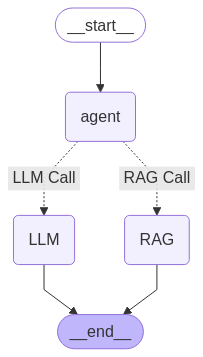

In [167]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [168]:
inputs = {"messages": ["Tell me about India's Industrial Growth"]}

In [169]:
output = app5.invoke(inputs)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The query explicitly asks about India's industrial growth."
-> Router ->
India
-> Calling RAG ->
Tell me about India's Industrial Growth
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 19
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 17
}
]

In [170]:
output

{'RAGtool': 'This text does not contain any information about the llama3 model. It discusses scalars, using the example of low, mean, and high temperatures in a weather model, and mentions machine learning (ML) as a term for groups of numbers.'}

In [171]:
inputs = {"messages": ["Tell me about first prime minister of india?"]}

In [172]:
output = app5.invoke(inputs)

Tell me about first prime minister of india?


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 51
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 48
}
]

In [ ]:
inputs = {"messages": ["who build the Taj Mahal?"]}

In [173]:
output = app5.invoke(inputs)

Tell me about first prime minister of india?


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 47
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 45
}
]

In [ ]:
output

{'messages': ['who build the Taj Mahal?',
  'India',
  'The provided text does not mention anything about the Taj Mahal, so I cannot answer this question from the provided context.']}

In [ ]:
inputs = {"messages": ["who is a president of USA?"]}

In [ ]:
output = app5.invoke(inputs)

who is a president of USA?
Topic='Not Related' Reasoning='The provided query is not related to India.'
-> Router ->
Not Related
-> Calling LLM ->


In [174]:
output

{'RAGtool': 'This text does not contain any information about the llama3 model. It discusses scalars, using the example of low, mean, and high temperatures in a weather model, and mentions machine learning (ML) as a term for groups of numbers.'}

In [ ]:
import os

from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Users\Mohan\anaconda3\envs\rag_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [177]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [178]:
'''
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
llm.invoke("hi").content'''

'\nfrom langchain_google_genai import GoogleGenerativeAIEmbeddings\nembeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")\nfrom langchain_google_genai import ChatGoogleGenerativeAI\nllm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")\nllm.invoke("hi").content'

In [179]:
import json
#from langchain_core.messages import ToolMessage
from langchain_core.tools import tool
from langchain_core.utils.function_calling import convert_to_openai_tool

In [180]:
@tool
def multiply(first_number: int, second_number: int):
    """Multiplies two numbers together."""
    return first_number * second_number

In [181]:
tools=[convert_to_openai_tool(multiply)]

In [182]:
model_with_tools = llm.bind(tools=tools)

In [183]:
response = model_with_tools.invoke('What is 35 * 46?')

In [184]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_a9vx', 'function': {'arguments': '{"first_number":35,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 976, 'total_tokens': 1067, 'completion_time': 0.165454545, 'prompt_time': 0.03782519, 'queue_time': 0.23962712999999997, 'total_time': 0.203279735}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2aa28245-0607-44d9-adba-aac53d9e462b-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 35, 'second_number': 46}, 'id': 'call_a9vx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 976, 'output_tokens': 91, 'total_tokens': 1067})

In [185]:
tool_calls = response.additional_kwargs.get('tool_calls')

In [186]:
tool_calls

[{'id': 'call_a9vx',
  'function': {'arguments': '{"first_number":35,"second_number":46}',
   'name': 'multiply'},
  'type': 'function'}]

In [187]:
for tool_call in tool_calls:
    print('Function Name:',tool_call.get('function').get('name'))
    print('Function Arguments:',tool_call.get('function').get('arguments'))
    print(tool_call)

Function Name: multiply
Function Arguments: {"first_number":35,"second_number":46}
{'id': 'call_a9vx', 'function': {'arguments': '{"first_number":35,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}


In [188]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage


In [189]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [190]:
def invoke_model(state):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [191]:
input={"messages":["how much is 30*35?"]}

In [192]:
invoke_model(input)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_twjd', 'function': {'arguments': '{"first_number":30,"second_number":35}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 976, 'total_tokens': 1067, 'completion_time': 0.165454545, 'prompt_time': 0.034429928, 'queue_time': 0.23173468200000003, 'total_time': 0.199884473}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5667b2ec-9e42-4ba6-94f0-fe05c2c72824-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 30, 'second_number': 35}, 'id': 'call_twjd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 976, 'output_tokens': 91, 'total_tokens': 1067})]}

In [193]:
def invoke_tool(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    print(f"here is a tool_calls {tool_calls}")
    multiply_call = None

    for tool_call in tool_calls:
        if tool_call.get("function").get("name") == "multiply":
            multiply_call = tool_call

    if multiply_call is None:
        raise Exception("No adder input found.")

    res = multiply.invoke(
        json.loads(multiply_call.get("function").get("arguments"))
    )

    return {"messages" : [res]
    }

In [194]:
from langgraph.graph import StateGraph,END
workflow6 = StateGraph(AgentState) ### StateGraph with AgentState
workflow6.add_node("agent", invoke_model)
workflow6.add_node("tool", invoke_tool)

In [195]:

workflow6.add_edge("tool", END)
workflow6.set_entry_point("agent")

In [196]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "multiply"
    else:
        return "end"

In [ ]:
workflow6.add_conditional_edges("agent",router,{"multiply": "tool","end": END})

In [ ]:
app6 = workflow6.compile()

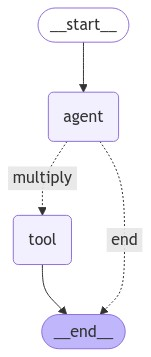

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app6.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [ ]:
app6.invoke({"messages": ["What is LLM?"]})

here is a tool_calls [{'id': 'call_hjy5', 'function': {'arguments': '{"first_number":10,"second_number":5}', 'name': 'multiply'}, 'type': 'function'}]


{'messages': ['What is LLM?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hjy5', 'function': {'arguments': '{"first_number":10,"second_number":5}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 189, 'prompt_tokens': 971, 'total_tokens': 1160, 'completion_time': 0.343636364, 'prompt_time': 0.031546433, 'queue_time': 0.0043375330000000045, 'total_time': 0.375182797}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-962c0569-a433-4b0f-b1ab-d266713b8f98-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 10, 'second_number': 5}, 'id': 'call_hjy5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 971, 'output_tokens': 189, 'total_tokens': 1160}),
  50]}

In [ ]:
app6.invoke({"messages": ["What is 123 * 456?"]})

here is a tool_calls [{'id': 'call_djhs', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function'}]


{'messages': ['What is 123 * 456?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_djhs', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 95, 'prompt_tokens': 978, 'total_tokens': 1073, 'completion_time': 0.172727273, 'prompt_time': 0.031384243, 'queue_time': 0.004106367, 'total_time': 0.204111516}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-45b88bbb-32d7-43c1-bf5b-d34d7cb7fb35-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 123, 'second_number': 4456}, 'id': 'call_djhs', 'type': 'tool_call'}], usage_metadata={'input_tokens': 978, 'output_tokens': 95, 'total_tokens': 1073}),
  548088]}

In [ ]:
for output in app6.stream({"messages": ["What is 123 * 456?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_697g', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 978, 'total_tokens': 1072, 'completion_time': 0.170909091, 'prompt_time': 0.031686312, 'queue_time': 0.004383204000000002, 'total_time': 0.202595403}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1c0aa786-ffa7-4f1c-92c3-b0cbeb63fc9a-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 123, 'second_number': 4456}, 'id': 'call_697g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 978, 'output_tokens': 94, 'total_tokens': 1072})]}


here is a tool_calls [{'id': 'call_697g', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function

In [ ]:
for output in app6.stream({"messages": ["what s LLM?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool-use>\n{\n\t"tool_call": {\n\t\t"id": "pending",\n\t\t"type": "function",\n\t\t"function": {\n\t\t\t"name": "lookup"\n\t\t},\n\t\t"parameters": {\n\t\t\t"query": "LLM"\n\t\t}\n\t}\n}\n</tool-use> \n'}}

In [ ]:
mydict={"sunny":["savita"]}

In [ ]:
mydict.get("bunny",[])

[]